Load the created datset (*new_features.pickle*)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving new_features.pickle to new_features.pickle


Read the datset 

In [ ]:

import pickle

with open('new_features.pickle', 'rb') as handle:
    wav_features = pickle.load(handle)
wav_features.keys()

dict_keys(['data', 'target1', 'target2', 'data_paths'])

Train set

In [ ]:

#Test_ratio=34.5%
#Train_ratio=65.5%
import pandas as pd
wav_df_train = {}
wav_df_train["data"] = wav_features["data"][0:11014]
wav_df_train["target1"] = wav_features["target1"][0:11014]
wav_df_train["target2"] = wav_features["target2"][0:11014]
wav_df_train['data_paths'] = wav_features['data_paths'][0:11014]
pd.DataFrame.from_dict(wav_df_train)




,data,target1,target2,data_paths
0,"[0.5289342, 4.2419505, -246.18243, 124.07058, ...",m,1,/content/drive/MyDrive/Voice/15997.wav
1,"[0.545538, 2.5391963, -266.52774, 124.84484, -...",m,1,/content/drive/MyDrive/Voice/16001.wav
2,"[0.66471267, 1.480545, -278.03024, 92.29198, -...",m,1,/content/drive/MyDrive/Voice/16005.wav
3,"[0.6309597, 2.3633683, -280.59198, 101.97776, ...",m,1,/content/drive/MyDrive/Voice/16009.wav
4,"[0.5500485, 2.6058056, -244.53696, 126.14818, ...",m,1,/content/drive/MyDrive/Voice/16013.wav
...,...,...,...,...
11009,"[0.68769485, 2.0341437, -361.6027, 93.85937, -...",f,4,/content/drive/MyDrive/Voice/5560.wav
11010,"[0.6302621, 4.7991157, -286.13794, 115.13527, ...",f,4,/content/drive/MyDrive/Voice/5564.wav
11011,"[0.7036633, 1.7361923, -388.12576, 81.93246, -...",f,4,/content/drive/MyDrive/Voice/5568.wav
11012,"[0.62669903, 3.1588116, -332.90656, 112.10484,...",f,4,/content/drive/MyDrive/Voice/5572.wav


Test set

In [ ]:
wav_df_test = {}
wav_df_test["data"] = wav_features["data"][11014:]
wav_df_test["target1"] = wav_features["target1"][11014:]
wav_df_test["target2"] = wav_features["target2"][11014:]
wav_df_test['data_paths'] = wav_features['data_paths'][11014:]
pd.DataFrame.from_dict(wav_df_test)

,data,target1,target2,data_paths
0,"[0.66338867, 3.6679378, -311.72137, 117.56277,...",m,1,/content/drive/MyDrive/Voice/5577.wav
1,"[0.6911323, 3.2481458, -321.19254, 103.36864, ...",m,1,/content/drive/MyDrive/Voice/5581.wav
2,"[0.6422232, 4.49795, -264.73663, 126.68786, -2...",m,1,/content/drive/MyDrive/Voice/5585.wav
3,"[0.7343058, 3.4506962, -307.43277, 120.49002, ...",m,1,/content/drive/MyDrive/Voice/5589.wav
4,"[0.6448471, 3.6886601, -269.4961, 128.85428, -...",m,1,/content/drive/MyDrive/Voice/5593.wav
...,...,...,...,...
5807,"[0.53141373, 0.13135657, -482.52325, 78.08104,...",f,4,/content/drive/MyDrive/Voice/10563.wav
5808,"[0.5613168, 0.107608914, -520.21716, 77.23879,...",f,4,/content/drive/MyDrive/Voice/10567.wav
5809,"[0.5366279, 0.26464286, -494.69412, 88.20608, ...",f,4,/content/drive/MyDrive/Voice/10571.wav
5810,"[0.59663016, 0.22014323, -515.9213, 90.38089, ...",f,4,/content/drive/MyDrive/Voice/10575.wav


Classification

In [ ]:
import sys
import collections

def parse_classification_report(clfreport):
    """
    Parse a sklearn classification report into a dict keyed by class name
    and containing a tuple (precision, recall, fscore, support) for each class
    """
    lines = clfreport.split('\n')
    # Remove empty lines
    lines = list(filter(lambda l: not len(l.strip()) == 0, lines))

    # Starts with a header, then score for each class and finally an average
    header = lines[0]
    cls_lines = lines[1:-1]
    avg_line = lines[-1]

    assert header.split() == ['precision', 'recall', 'f1-score', 'support']
    assert avg_line.split()[1] == 'avg'

    # We cannot simply use split because class names can have spaces. So instead
    # figure the width of the class field by looking at the indentation of the
    # precision header
    cls_field_width = len(header) - len(header.lstrip())
    # Now, collect all the class names and score in a dict
    def parse_line(l):
        """Parse a line of classification_report"""
        cls_name = l[:cls_field_width].strip()
        something = l[cls_field_width:].split()
        if len(something) == 2:
            something.insert(0, 0)
            something.insert(0, 0)
        # print(something)
        precision, recall, fscore, support = something
        precision = float(precision)
        recall = float(recall)
        fscore = float(fscore)
        support = int(support)
        return (cls_name, precision, recall, fscore, support)

    data = collections.OrderedDict()
    for l in cls_lines:
        ret = parse_line(l)
        cls_name = ret[0]
        scores = ret[1:]
        data[cls_name] = scores

    # average
    data['avg'] = parse_line(avg_line)[1:]

    return data

def report_to_latex_table(data):
    avg_split = False
    out = ""
    out += "\\begin{table}\n"
    out += "\\caption{Latex Table from Classification Report}\n"
    out += "\\label{table:classification:report}\n"
    out += "\\centering\n"
    out += "\\begin{tabular}{c | c c c r}\n"
    out += "Class & Precision & Recall & F-score & Support\\\\\n"
    out += "\midrule\n"
    for cls, scores in data.items():
        if 'micro' in cls:
            out += "\\midrule\n"
        out += cls + " & " + " & ".join([str(s) for s in scores])
        out += "\\\\\n"
    out += "\\end{tabular}\n"
    out += "\\end{table}"
    return out

  0%|          | 0/5 [00:00<?, ?it/s]


 MLPClassifier(early_stopping=True, hidden_layer_sizes=(256, 512, 512, 256),
              max_iter=100, validation_fraction=0.05)
              precision    recall  f1-score   support

           m       0.85      0.88      0.87      2787
           f       0.89      0.86      0.87      3025

    accuracy                           0.87      5812
   macro avg       0.87      0.87      0.87      5812
weighted avg       0.87      0.87      0.87      5812



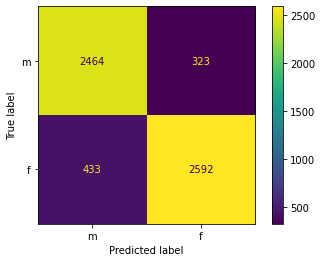


 SVC()
              precision    recall  f1-score   support

           m       0.89      0.89      0.89      2787
           f       0.90      0.89      0.90      3025

    accuracy                           0.89      5812
   macro avg       0.89      0.89      0.89      5812
weighted avg       0.89      0.89      0.89      5812



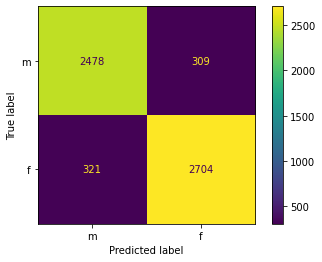


 SVC(kernel='linear')
              precision    recall  f1-score   support

           m       0.89      0.87      0.88      2787
           f       0.88      0.91      0.89      3025

    accuracy                           0.89      5812
   macro avg       0.89      0.89      0.89      5812
weighted avg       0.89      0.89      0.89      5812



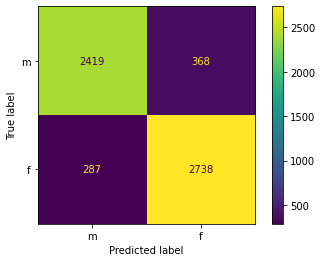


 GaussianNB()
              precision    recall  f1-score   support

           m       0.84      0.78      0.81      2787
           f       0.81      0.87      0.84      3025

    accuracy                           0.83      5812
   macro avg       0.83      0.82      0.82      5812
weighted avg       0.83      0.83      0.83      5812



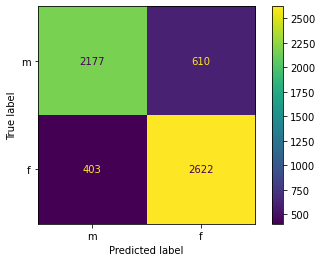


 KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           m       0.83      0.82      0.82      2787
           f       0.83      0.84      0.84      3025

    accuracy                           0.83      5812
   macro avg       0.83      0.83      0.83      5812
weighted avg       0.83      0.83      0.83      5812



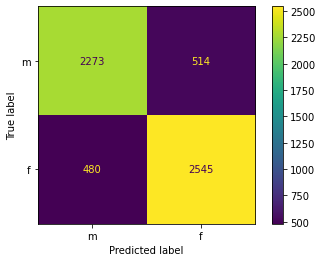

In [ ]:
# Classification of sex 
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tqdm.auto import tqdm
import warnings
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc

warnings.filterwarnings("ignore")

classifiers = [
    MLPClassifier(max_iter=100, early_stopping=True, learning_rate_init=0.001, 
                  validation_fraction=0.05,
                  verbose=False, hidden_layer_sizes=(256, 512, 512, 256)),
    SVC(kernel="rbf",),
    SVC(kernel="linear"),
    # SVC(kernel="poly"),
    GaussianNB(),
    KNeighborsClassifier(3)
]

target_names1 = ["m", "f"]
target_names2 = ["1","2","3","4"]
def eval(y_true, y_pred, clf=""):
    cr = classification_report(y_true, y_pred, target_names=target_names1)
    print(cr)
    data = parse_classification_report(str(cr))
    # print(report_to_latex_table(data))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names1)
    disp.plot()
    plt.savefig(f"cm_{clf}.pdf")
    plt.show()
    # plot_scatter(clf)

X_train, X_test, y_train, y_test = wav_df_train["data"],  wav_df_test["data"],wav_df_train["target1"],wav_df_test["target1"]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
for clf in tqdm(classifiers):
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print("\n", clf)
    eval(y_test, y_pred, clf)







  0%|          | 0/5 [00:00<?, ?it/s]

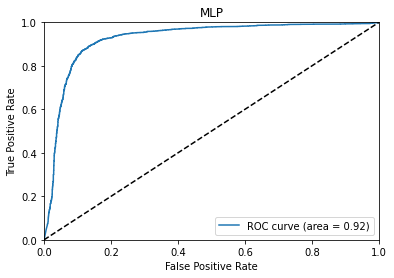

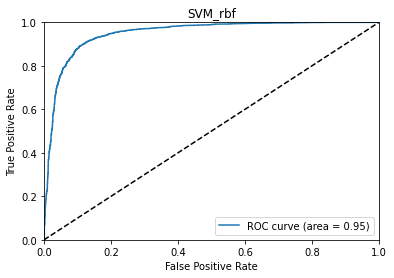

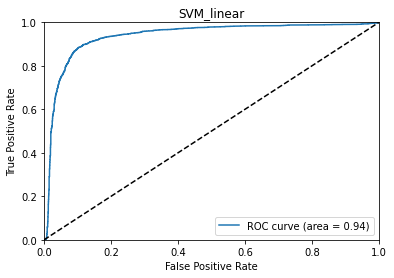

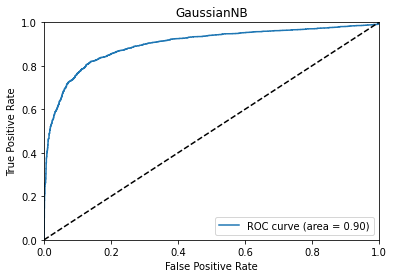

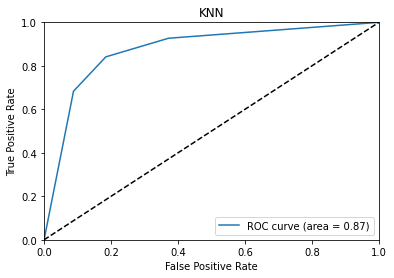

In [ ]:
# ROC curves of classification of sex
classifiers = [
    MLPClassifier(max_iter=100, early_stopping=True, learning_rate_init=0.001, 
                  validation_fraction=0.05,
                  verbose=False, hidden_layer_sizes=(256, 512, 512, 256)),
    SVC(kernel="rbf",probability=True),
    SVC(kernel="linear",probability=True),
    # SVC(kernel="poly"),
    GaussianNB(),
    KNeighborsClassifier(3)
]
names=['MLP','SVM_rbf','SVM_linear','GaussianNB','KNN']
i=0
for clf in tqdm(classifiers):
    #clf = SVC(kernel='linear' ,probability=True)
    probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1],pos_label='m')
    roc_auc = auc(fpr, tpr)
    plt.clf()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(names[i])
    i=i+1
    plt.legend(loc="lower right")
    plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

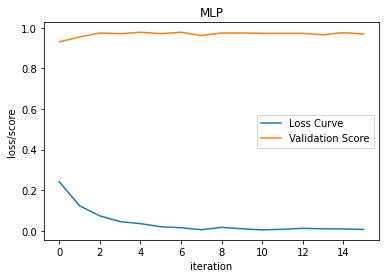

In [ ]:
# loss and accuracy curve for MLP classifier in classification of sex
for clf in tqdm(classifiers):
    if "MLP" in str(clf):
        plt.plot(clf.loss_curve_, label="Loss Curve")
        plt.plot(clf.validation_scores_, label="Validation Score")
        plt.legend()
        plt.ylabel("loss/score")
        plt.xlabel("iteration")
        plt.savefig(f"MLP_loss.pdf")
        plt.title(names[0])

  0%|          | 0/5 [00:00<?, ?it/s]


 MLPClassifier(early_stopping=True, hidden_layer_sizes=(256, 512, 512, 256),
              max_iter=100, validation_fraction=0.05)
              precision    recall  f1-score   support

           1       0.42      0.43      0.43      1450
           2       0.42      0.37      0.39      1453
           3       0.35      0.48      0.41      1455
           4       0.36      0.27      0.31      1454

    accuracy                           0.39      5812
   macro avg       0.39      0.39      0.38      5812
weighted avg       0.39      0.39      0.38      5812



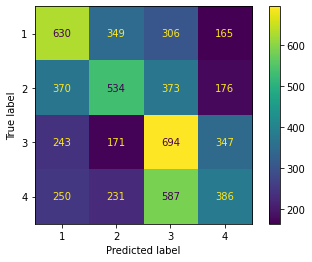


 SVC()
              precision    recall  f1-score   support

           1       0.47      0.47      0.47      1450
           2       0.43      0.40      0.41      1453
           3       0.39      0.47      0.43      1455
           4       0.38      0.34      0.36      1454

    accuracy                           0.42      5812
   macro avg       0.42      0.42      0.42      5812
weighted avg       0.42      0.42      0.42      5812



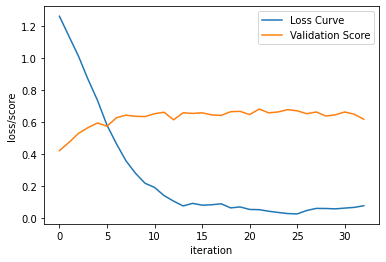

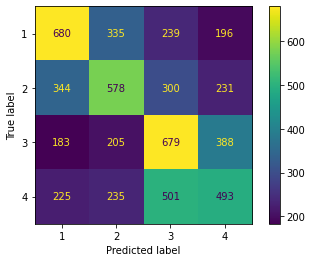


 SVC(kernel='linear')
              precision    recall  f1-score   support

           1       0.47      0.45      0.46      1450
           2       0.42      0.36      0.39      1453
           3       0.39      0.52      0.44      1455
           4       0.38      0.32      0.35      1454

    accuracy                           0.41      5812
   macro avg       0.42      0.41      0.41      5812
weighted avg       0.42      0.41      0.41      5812



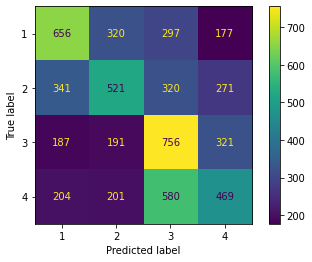


 GaussianNB()
              precision    recall  f1-score   support

           1       0.54      0.22      0.31      1450
           2       0.36      0.34      0.35      1453
           3       0.35      0.38      0.36      1455
           4       0.33      0.51      0.40      1454

    accuracy                           0.36      5812
   macro avg       0.39      0.36      0.36      5812
weighted avg       0.39      0.36      0.36      5812



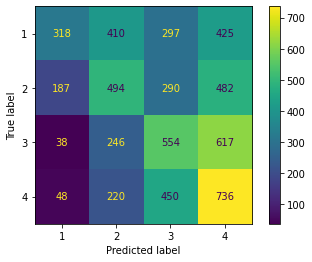


 KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           1       0.33      0.48      0.39      1450
           2       0.32      0.27      0.29      1453
           3       0.34      0.31      0.32      1455
           4       0.34      0.27      0.30      1454

    accuracy                           0.33      5812
   macro avg       0.33      0.33      0.33      5812
weighted avg       0.33      0.33      0.33      5812



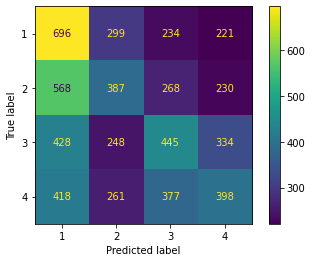

In [ ]:
# Classification of emotions
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tqdm.auto import tqdm
import warnings
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
warnings.filterwarnings("ignore")

classifiers = [
    MLPClassifier(max_iter=100, early_stopping=True, learning_rate_init=0.001, 
                  validation_fraction=0.05,
                  verbose=False, hidden_layer_sizes=(256, 512, 512, 256)),
     # MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08,
       #             hidden_layer_sizes = (300,), learning_rate = 'adaptive',
        #            max_iter = 500),
    SVC(kernel="rbf"),
    SVC(kernel="linear"),
    # SVC(kernel="poly"),
    GaussianNB(),
    KNeighborsClassifier(3)
]

target_names1 = ["m", "f"]
target_names2 = ["1","2","3","4"]
def eval(y_true, y_pred, clf=""):
    cr = classification_report(y_true, y_pred, target_names=target_names2)
    print(cr)
    data = parse_classification_report(str(cr))
    # print(report_to_latex_table(data))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names2)
    disp.plot()
    plt.savefig(f"cm_{clf}.pdf")
    plt.show()
    # plot_scatter(clf)

X_train, X_test, y_train, y_test = wav_df_train["data"],  wav_df_test["data"],wav_df_train["target2"],wav_df_test["target2"]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
for clf in tqdm(classifiers):
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print("\n", clf)
    eval(y_test, y_pred, clf)
    if "MLP" in str(clf):
        plt.plot(clf.loss_curve_, label="Loss Curve")
        plt.plot(clf.validation_scores_, label="Validation Score")
        plt.legend()
        plt.ylabel("loss/score")
        plt.xlabel("iteration")
        plt.savefig(f"MLP_loss.pdf")



# Classification of emotion with only 2000 samples (test_size=30%)

In [ ]:
wav_df = {}
wav_df["data"] = wav_features["data"][0:2000]
wav_df["target1"] = wav_features["target1"][0:2000]
wav_df["target2"] = wav_features["target2"][0:2000]
wav_df['data_paths'] = wav_features['data_paths'][0:2000]
pd.DataFrame.from_dict(wav_df)

,data,target1,target2,data_paths
0,"[0.5289342, 4.2419505, -246.18243, 124.07058, ...",m,1,/content/drive/MyDrive/Voice/15997.wav
1,"[0.545538, 2.5391963, -266.52774, 124.84484, -...",m,1,/content/drive/MyDrive/Voice/16001.wav
2,"[0.66471267, 1.480545, -278.03024, 92.29198, -...",m,1,/content/drive/MyDrive/Voice/16005.wav
3,"[0.6309597, 2.3633683, -280.59198, 101.97776, ...",m,1,/content/drive/MyDrive/Voice/16009.wav
4,"[0.5500485, 2.6058056, -244.53696, 126.14818, ...",m,1,/content/drive/MyDrive/Voice/16013.wav
...,...,...,...,...
1995,"[0.75661075, 0.65542275, -507.1557, 72.79428, ...",m,1,/content/drive/MyDrive/Voice/403.wav
1996,"[0.6973286, 0.7470854, -449.31857, 111.44949, ...",m,2,/content/drive/MyDrive/Voice/408.wav
1997,"[0.70356005, 0.3365928, -450.0288, 135.57466, ...",m,2,/content/drive/MyDrive/Voice/412.wav
1998,"[0.7130918, 0.29348376, -494.85358, 91.5606, -...",m,2,/content/drive/MyDrive/Voice/416.wav


  0%|          | 0/5 [00:00<?, ?it/s]


 MLPClassifier(early_stopping=True, hidden_layer_sizes=(256, 512, 512, 256),
              max_iter=100, validation_fraction=0.05)
              precision    recall  f1-score   support

           1       0.70      0.67      0.68       146
           2       0.67      0.72      0.70       132
           3       0.71      0.74      0.72       157
           4       0.74      0.69      0.71       165

    accuracy                           0.70       600
   macro avg       0.70      0.71      0.70       600
weighted avg       0.71      0.70      0.70       600



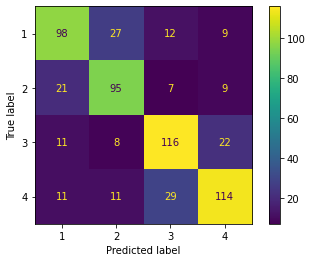


 SVC()
              precision    recall  f1-score   support

           1       0.61      0.65      0.63       146
           2       0.63      0.61      0.62       132
           3       0.63      0.66      0.64       157
           4       0.69      0.65      0.67       165

    accuracy                           0.64       600
   macro avg       0.64      0.64      0.64       600
weighted avg       0.64      0.64      0.64       600



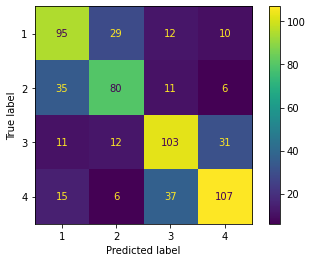


 SVC(kernel='linear')
              precision    recall  f1-score   support

           1       0.43      0.51      0.47       146
           2       0.49      0.51      0.50       132
           3       0.52      0.39      0.45       157
           4       0.48      0.51      0.50       165

    accuracy                           0.48       600
   macro avg       0.48      0.48      0.48       600
weighted avg       0.48      0.48      0.48       600



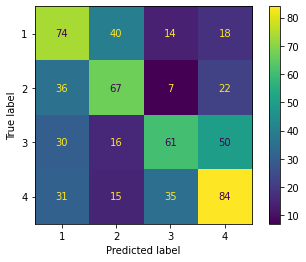


 GaussianNB()
              precision    recall  f1-score   support

           1       0.38      0.26      0.31       146
           2       0.47      0.43      0.45       132
           3       0.45      0.45      0.45       157
           4       0.40      0.55      0.46       165

    accuracy                           0.43       600
   macro avg       0.43      0.42      0.42       600
weighted avg       0.43      0.43      0.42       600



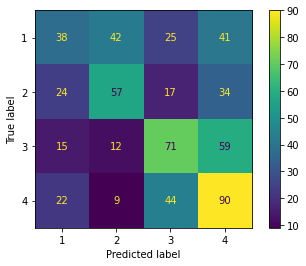


 KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           1       0.64      0.71      0.67       146
           2       0.65      0.58      0.62       132
           3       0.68      0.75      0.71       157
           4       0.72      0.65      0.69       165

    accuracy                           0.68       600
   macro avg       0.67      0.67      0.67       600
weighted avg       0.68      0.68      0.67       600



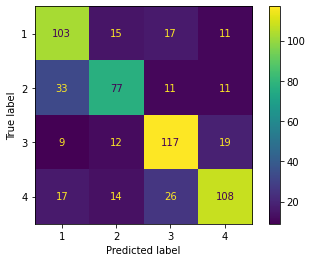

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tqdm.auto import tqdm
import warnings
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
warnings.filterwarnings("ignore")

classifiers = [
    MLPClassifier(max_iter=100, early_stopping=True, learning_rate_init=0.001, 
                  validation_fraction=0.05,
                  verbose=False, hidden_layer_sizes=(256, 512, 512, 256)),
     # MLPClassifier(alpha = 0.01, batch_size = 256, epsilon = 1e-08,
       #             hidden_layer_sizes = (300,), learning_rate = 'adaptive',
        #            max_iter = 500),
    SVC(kernel="rbf"),
    SVC(kernel="linear"),
    # SVC(kernel="poly"),
    GaussianNB(),
    KNeighborsClassifier(3)
]

target_names1 = ["m", "f"]
target_names2 = ["1","2","3","4"]
def eval(y_true, y_pred, clf=""):
    cr = classification_report(y_true, y_pred, target_names=target_names2)
    print(cr)
    data = parse_classification_report(str(cr))
    # print(report_to_latex_table(data))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names2)
    disp.plot()
    plt.savefig(f"cm_{clf}.pdf")
    plt.show()
    # plot_scatter(clf)

X_train, X_test, y_train, y_test = train_test_split(wav_df["data"], wav_df["target2"], test_size=0.30, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
for clf in tqdm(classifiers):
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    print("\n", clf)
    eval(y_test, y_pred, clf)

        


  0%|          | 0/5 [00:00<?, ?it/s]

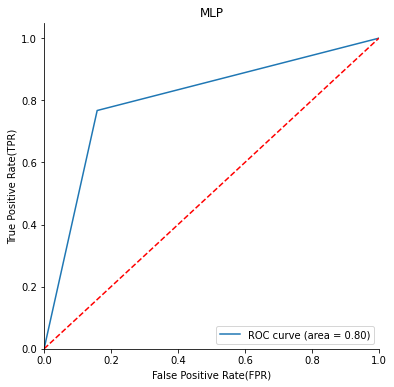

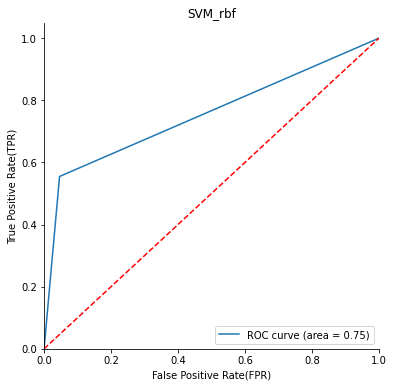

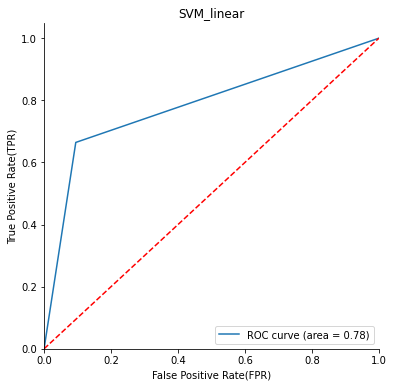

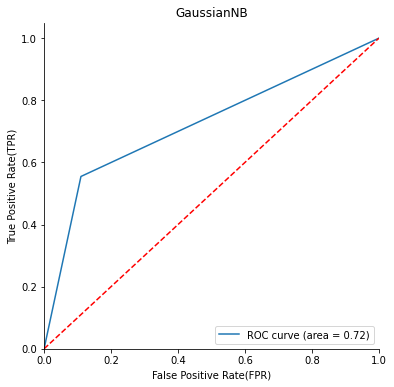

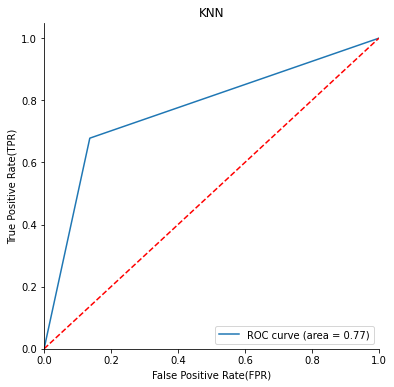

In [ ]:
# ROC curves of classification of emotion (with only 2000 samples)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



def plot_ROC(y_test, y_pred,names,i):
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    fig,axs = plt.subplots(1,1,figsize=(6,6))
    axs.spines['right'].set_visible(False)
    axs.spines['top'  ].set_visible(False)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
    axs.plot([0, 1], [0, 1],'r--')
    axs.set_xlim([0.0, 1.0])
    axs.set_ylim([0.0, 1.05])
    axs.set_xlabel('False Positive Rate(FPR)')
    axs.set_ylabel('True Positive Rate(TPR)')
    axs.set_title(names[i])
    axs.legend(loc="lower right")
    plt.show()

    
classifiers = [
    MLPClassifier(max_iter=100, early_stopping=True, learning_rate_init=0.001, 
                  validation_fraction=0.05,
                  verbose=False, hidden_layer_sizes=(256, 512, 512, 256)),
    SVC(kernel="rbf"),
    SVC(kernel="linear"),
    # SVC(kernel="poly"),
    GaussianNB(),
    KNeighborsClassifier(3)
]
names=['MLP','SVM_rbf','SVM_linear','GaussianNB','KNN']
i=0
y_test=np.array(y_test)
for clf in tqdm(classifiers):
  y_pred = clf.fit(X_train, y_train).predict(X_test)  
  y_pred = classifiers[0].fit(X_train, y_train).predict(X_test)
  y_test_class1=np.where( y_test !=1 ,0,1)    
  y_pred_class1=np.where( y_pred !=1 ,0,1)
  plot_ROC(y_test_class1, y_pred_class1,names,i) 
  i=i+1

  0%|          | 0/5 [00:00<?, ?it/s]

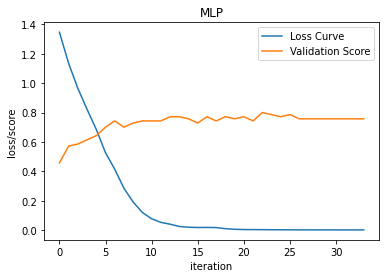

In [ ]:
# loss and accuracy curve for MLP classifier in classification of emotion
for clf in tqdm(classifiers):
    if "MLP" in str(clf):
        plt.plot(clf.loss_curve_, label="Loss Curve")
        plt.plot(clf.validation_scores_, label="Validation Score")
        plt.legend()
        plt.ylabel("loss/score")
        plt.xlabel("iteration")
        plt.savefig(f"MLP_loss.pdf")
        plt.title(names[0])